# Part 4: Neural Networks & Non-Linearity 🧠

In Part 3, we fit a straight line. But what if data is curved? 

A straight line can't fit a curve. We need **Non-Linearity**.

**Key Concept**: A Neural Network is just a stack of Linear Layers with "Activation Functions" in between.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

## 1. The Problem with Linear Models

Let's generate data that is a quadratic curve ($y = x^2$).

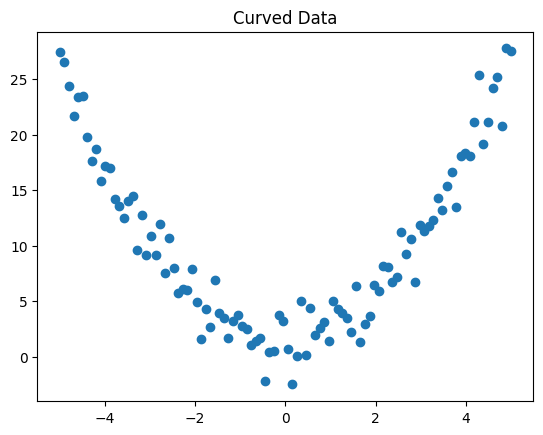

In [2]:
# Generate curved data
X = torch.linspace(-5, 5, 100).reshape(-1, 1)
y = X ** 2 + 1 + torch.randn(100, 1) * 2

plt.scatter(X, y)
plt.title("Curved Data")
plt.show()

If we try to fit this with `nn.Linear`, it will fail miserably (it will just draw a straight line through the middle).

## 2. Introducing Activation Functions

Activation functions introduce "bends" or "kinks" into the function. 

Common ones:
- **ReLU (Rectified Linear Unit)**: `max(0, x)`. The most popular. It just zeros out negatives.
- **Sigmoid**: Squashes numbers between 0 and 1.
- **Tanh**: Squashes numbers between -1 and 1.

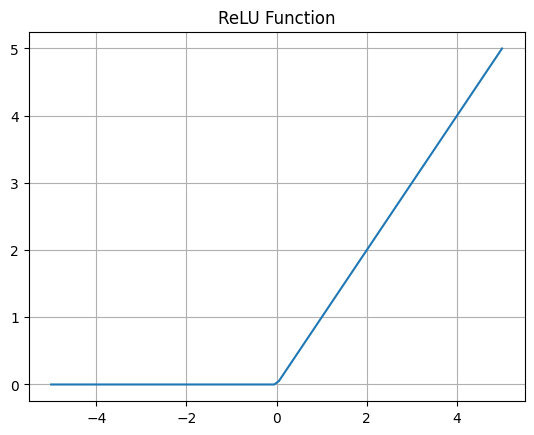

In [12]:
relu = nn.ReLU()
x_test = torch.linspace(-5, 5, 100)
y_relu = relu(x_test)

plt.plot(x_test, y_relu)
plt.title("ReLU Function")
plt.grid(True)
plt.show()

## 3. Building a Neural Network (MLP)

A **Multi-Layer Perceptron (MLP)** is just: 
`Linear -> Activation -> Linear -> Activation ... -> Linear`

Let's build one to fit our curve!

We use `nn.Sequential` to stack layers.

In [16]:
model = nn.Sequential(
    nn.Linear(1, 20),   # Input -> Hidden Layer (20 neurons)
    nn.ReLU(),          # Non-linear activation
    nn.Linear(20, 20),  # Hidden -> Hidden (20 neurons)
    nn.ReLU(),          # Non-linear activation
    nn.Linear(20, 1)    # Hidden -> Output
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


## 4. Train it!

The training loop is EXACTLY the same as before.

In [17]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam is usually better than SGD

for epoch in range(500):
    # Forward
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

Epoch 100: Loss = 5.1606
Epoch 200: Loss = 3.3937
Epoch 300: Loss = 3.0244
Epoch 400: Loss = 2.8610
Epoch 500: Loss = 2.7804


## 5. Visualize the Fit

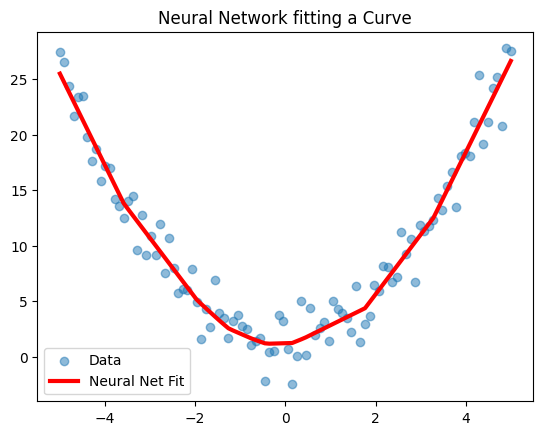

In [18]:
predicted = model(X).detach().numpy()

plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, predicted, 'r', linewidth=3, label='Neural Net Fit')
plt.legend()
plt.title("Neural Network fitting a Curve")
plt.show()

## 🧠 Summary

1. **Non-linearity** is essential for complex data.
2. **Activation Functions** (ReLU) provide this non-linearity.
3. **`nn.Sequential`** lets us stack layers easily.
4. A **Neural Network** is just a stack of Linear+Activation layers.

Next up: **The Training Loop** - Let's modularize our messy loop code!